# Deep Learning 101

This notebook presents the basics concepts that involve the concept of Deep Learning.

1. Linear Regression
2. Logistic Regression
3. **Artificial Neural Networks**
4. Deep Neural Networks
5. Convolutional Neural Networks

## 3. Artificial Neural Networks

These models are called *feedforward* because information **flows** through the function being evaluated from $x$, through the intermediate computations used to define $f$, and finally to the output $y$.

*Feedforward* neural networks are called networks because they are typically represented by composing together many different functions.

$$
    \begin{align}
    \hat{y} &= f(x) \\
            &= f^{(2)}(f^{(1)}(x))
    \end{align}
$$

$$f^{(i)}(h) = \sigma_i(W_ih + b_i)$$


$$\hat{y} = \sigma_2(W_2 \sigma_1(W_1 x + b_1) + b_2)$$

## Artificial Neural Networks with Keras and TensorFlow

**Activations functions** are non-linear functions applied when passing the output of a layer to the next layer or the final

| **Keras**      | **Example**                                                         | **Link**                 |
| -------------- |:------------------------------------------------------------------: | :-----------------------:|
| **Activation functions**| sigmoid, step, tanh, softmax, ReLU | [keras.io/activations/](https://keras.io/activations/)|



## 1. Load data

#### Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.random.seed(12049)


#### Getting the data

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


#### Explore visual data

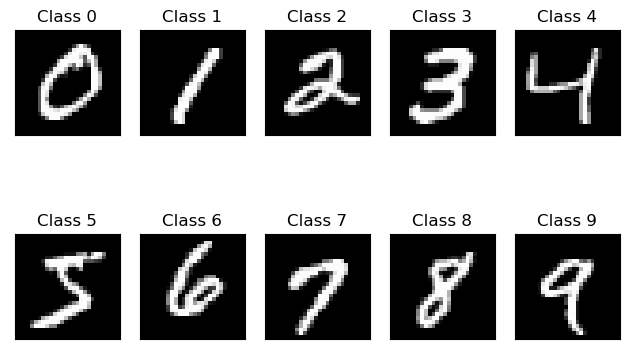

In [3]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()


In [4]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_test.shape)


X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_train.shape (10000,)


#### Reshaping and normalizing the inputs

In [5]:
# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

# normalizing the inputs
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print('X_train reshape:', X_train.shape)
print('X_test reshape:', X_test.shape)


X_train reshape: (60000, 784)
X_test reshape: (10000, 784)


#### Convert class vectors to binary class matrices

In [6]:
# 10 classes
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

print('y_train_cat shape:', y_train_cat.shape)
print('y_test_cat shape:', y_test_cat.shape)


y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


## 2. Define model

#### Add the input-, hidden- and output-layers

In [7]:
# building a linear stack of layers with the sequential model
model = tf.keras.models.Sequential()

# Add the input layer and hidden layer 1
model.add(tf.keras.layers.Dense(32, input_shape=(784,), activation='sigmoid'))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-10-18 12:49:49.176614: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-18 12:49:49.176720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Model visualization

In [8]:
# plot a Keras model
tf.keras.utils.plot_model(
    model,
    to_file="img/model03_ann.png",
    show_shapes=True,
    show_layer_names=True,
)


# prints a summary representation of your model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


![Artificial neural network](img/model03_ann.png)

## 3. Compile model

In [9]:
# compiling the sequential model
model.compile(
    "rmsprop",
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)


## 4. Fit model

In [10]:
# training the model and saving metrics in history
history = model.fit(
    X_train,
    y_train_cat,
    batch_size=256,
    epochs=50,
    verbose=2,
    validation_data=(X_test, y_test_cat),
)


Epoch 1/50


2023-10-18 12:49:49.899888: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-18 12:49:50.169762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-18 12:50:07.151745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 - 20s - loss: 1.1721 - categorical_accuracy: 0.7755 - val_loss: 0.6119 - val_categorical_accuracy: 0.8865 - 20s/epoch - 87ms/step
Epoch 2/50
235/235 - 15s - loss: 0.4688 - categorical_accuracy: 0.8958 - val_loss: 0.3580 - val_categorical_accuracy: 0.9120 - 15s/epoch - 65ms/step
Epoch 3/50
235/235 - 15s - loss: 0.3289 - categorical_accuracy: 0.9131 - val_loss: 0.2907 - val_categorical_accuracy: 0.9200 - 15s/epoch - 65ms/step
Epoch 4/50
235/235 - 15s - loss: 0.2778 - categorical_accuracy: 0.9237 - val_loss: 0.2552 - val_categorical_accuracy: 0.9272 - 15s/epoch - 65ms/step
Epoch 5/50
235/235 - 15s - loss: 0.2484 - categorical_accuracy: 0.9305 - val_loss: 0.2354 - val_categorical_accuracy: 0.9320 - 15s/epoch - 65ms/step
Epoch 6/50
235/235 - 15s - loss: 0.2284 - categorical_accuracy: 0.9356 - val_loss: 0.2187 - val_categorical_accuracy: 0.9379 - 15s/epoch - 65ms/step
Epoch 7/50
235/235 - 15s - loss: 0.2127 - categorical_accuracy: 0.9392 - val_loss: 0.2079 - val_categorical_accuracy:

## 5. Evaluate model

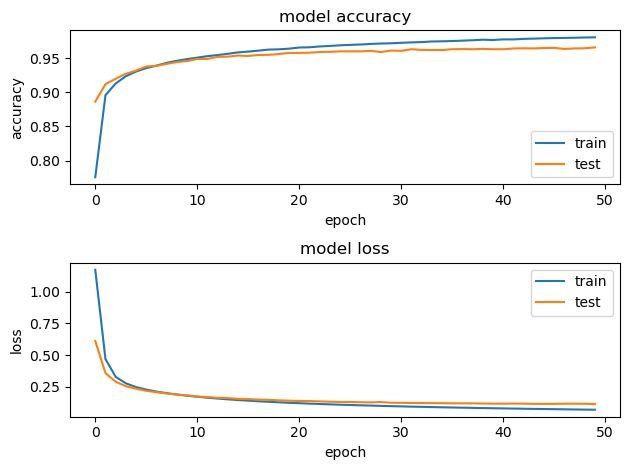

In [11]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [12]:
# evaluate model on test data
[test_loss, test_acc] = model.evaluate(X_test, y_test_cat)
print(
    "Evaluation result on Test Data:\nLoss = {}\nAccuracy = {}".format(
        test_loss, test_acc
    )
)


313/313 [==============================] - 17s 54ms/step - loss: 0.1143 - categorical_accuracy: 0.9660
Evaluation result on Test Data:
Loss = 0.11428400874137878
Accuracy = 0.9660000205039978


## References

* [Deep Learning Book](http://www.deeplearningbook.org)

* [Zero to Deep Learning™ Udemy Video Course](https://github.com/dataweekends/zero_to_deep_learning_udemy)

* [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)